# Netflix Movies and TV Shows

This dataset is taken from [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows). <br>

## Problem Definition:

Dataset contains all the details of movies and TV shows available on the netflix.<br>

- Understanding what content is available in different countries.<br>
- Identifying similar content by matching text-based features.<br>
- Network analysis of Actors / Directors and find interesting insights.<br>
- Does Netflix has more focus on TV Shows than movies in recent years.<br>

## Overview:

The dataset consist of a file :<br>
- netflix_titles (.csv)

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally..<br>
This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.<br>

## Data:

All TV Shows and Movies meta data on Netflix.<br>

**show_id**     : Unique ID for every Movie / Tv Show<br>
**type**        : Identifier - A Movie or TV Show<br>
**title**       : Title of the Movie / Tv Show<br>
**director**    : Director of the Movie<br>
**cast**        : Actors involved in the movie / show<br>
**country**     : Country where the movie / show was produced<br>
**date_added**  : Date it was added on Netflix<br>
**release_year**: Actual Release year of the move / show<br>
**rating**      : TV Rating of the movie / show<br>
**duration**    : Total Duration - in minutes or number of seasons<br>
**listed_in**   : Genere<br>
**description** : The summary description <br>

## Importing Dataset

In [58]:
# importing all the libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- That means we got some null values in few columns, let's handle them later.

In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As we can see, there are a lot of missing values in the director, cast and country columns. For the country column, I am going to take the mode of available countries and assign it to the missing values. I will be doing the same for the date added and ratings column.

In [5]:
# creating a copy of orignal data to work on
netflix = data.copy()

**Filling up the missing values with most common value in the column**

In [31]:

netflix["rating"] = netflix["rating"].fillna(netflix["rating"].mode()[0])
netflix["date_added"] = netflix["date_added"].fillna(netflix["date_added"].mode()[0])
netflix["country"] = netflix["country"].fillna(netflix["country"].mode()[0])

In [32]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
target_ages        0
genre_main         0
dtype: int64

In [33]:
x = netflix['type'].value_counts().reset_index()

fig = px.pie(x,values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))

- It is evident that there are more Movies on Netflix than TV shows.

### Analysing netflix ratings

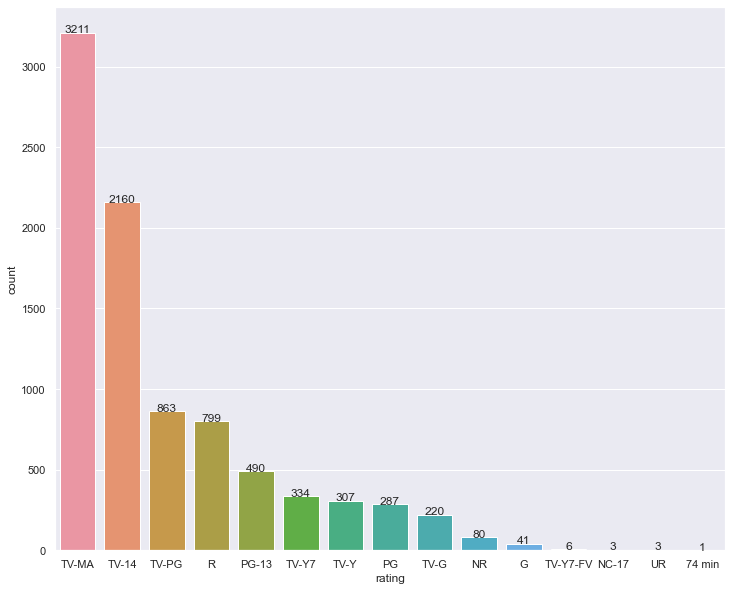

In [34]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")

ax = sns.countplot(x="rating", data=netflix, order=netflix["rating"].value_counts().index[0:15])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center')

- The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.<br>

- Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.<br>

- Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".<br>

In [35]:
# Exploring all the ratings
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

**Adding new column as target_ages**

In [36]:
# adding new column as ratings_ages
ratings_ages = {
    'PG-13': 'Teens',
    'PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-14': 'Teens',
    'TV-Y': 'Kids',
    'R': 'Adults',
    'TV-G': 'Kids',
    'TV-Y7': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}
netflix["target_ages"] = netflix["rating"].replace(ratings_ages)

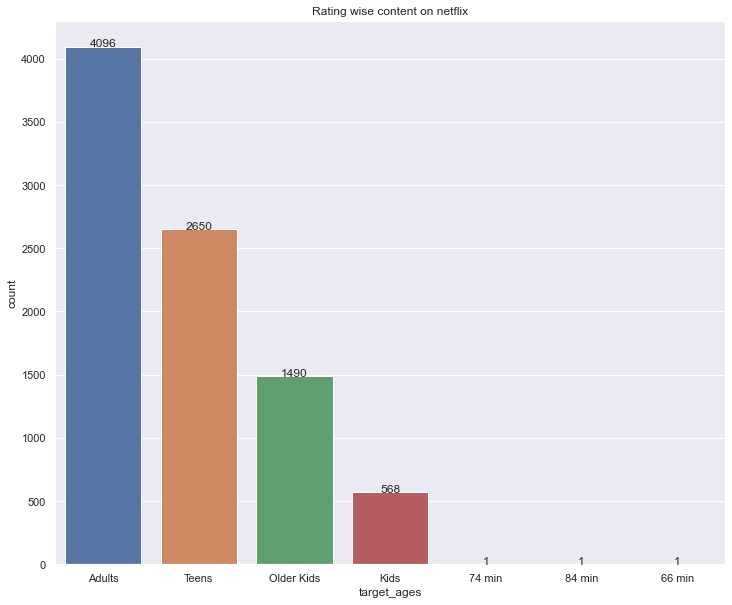

In [37]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plt.title("Rating wise content on netflix")

ax = sns.countplot(x="target_ages", data=netflix, order=netflix["target_ages"].value_counts().index[:])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center')


**Adding a column Genre_main for genre analysis**

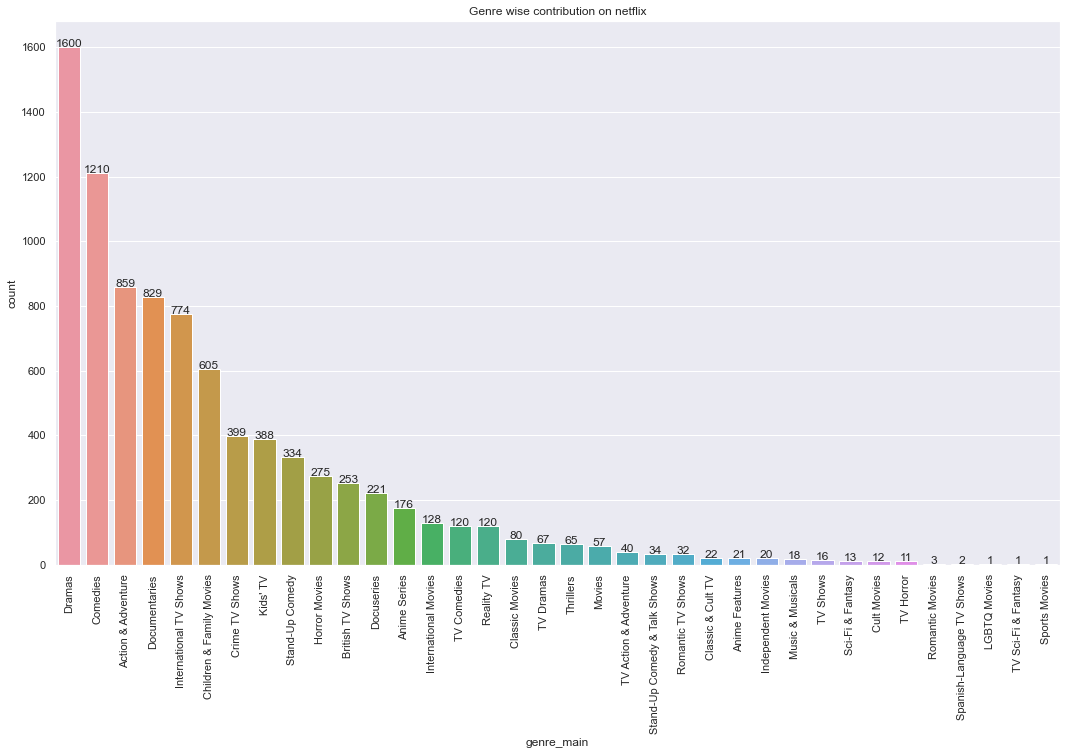

In [57]:
netflix["genre_main"] = netflix["listed_in"].apply(lambda x:x.split(",")[0])
plt.figure(figsize=(18,10))
plt.title("Genre wise contribution on netflix")
ax = sns.countplot(x="genre_main", data=netflix, order=netflix["genre_main"].value_counts().index[:])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center')
ax.tick_params(axis='x', rotation=90)


**So, 'Dramas, Comedies, Action & Adventure, Documentries and International TV Shows' Categories covers most of content on Netflix** <br>

Let's have a look at wordcloud.<br> 

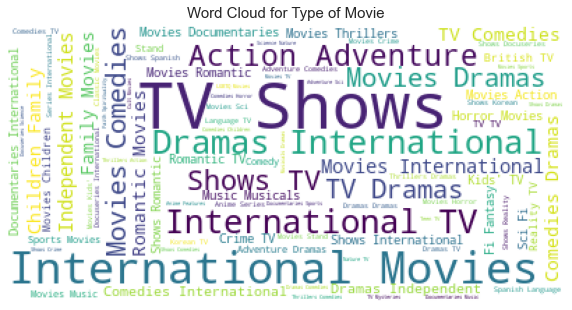

In [72]:
text = ' '.join(netflix['listed_in'])

wordcloud = WordCloud(random_state=1, 
                      background_color='white', 
#                       colormap='Pastel1',  
                      stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Type of Movie',size='15')
plt.show()

**Lets analyse the country wise content.**<br>

I will drop the director column as filling up the values will not be practically possible. Same for the cast column. 

In [111]:
# making a new copy for country analysis
netflix_country = netflix.copy()
netflix_country = netflix_country.drop(["cast","director"], axis=1)
netflix_country = netflix_country.dropna()
netflix_country.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
target_ages     0
genre_main      0
dtype: int64

In [112]:
netflix_country["country_main"] = netflix_country["country"].apply(lambda x:x.split(",")[0])

In [113]:
country_df = netflix_country['country_main'].value_counts().reset_index()
country_df = country_df[country_df['country_main'] /  country_df['country_main'].sum() > 0.01]

print("Country wise contribution on Netflix")
fig = px.pie(country_df, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

Country wise contribution on Netflix


- After dividing the dataset on the basis of country of production, we see that United States holds the highest percentage, about more than half of the total content. <br>
- India comes second in the list with about 13.3 percentage share. <br>
(Note: We have filled the NaN values in the country_main column with the mean() method.

In [114]:
warnings.filterwarnings("ignore")

print("An overview treemap of all the netflix data")
fig = px.treemap(netflix_country, path=['type','country_main'], width=800, height=400)#,values='values'

fig.update_layout(
     #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

An overview treemap of all the netflix data


**Below are the treemaps for top 5 contributing countries on netflix**

In [138]:
top_con_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan']

for i in top_con_list:
    print("Content for",i,end=(''))
    fig = px.treemap(netflix_country[netflix_country['country']==i], path=['country','type','genre_main','target_ages'],
                      color='target_ages', hover_data=['target_ages'])
    fig.show()



Content for United States

Content for India

Content for United Kingdom

Content for Canada

Content for Japan

In [69]:
# let's see how any movies and TV shows we have
netflix_movies = netflix[netflix["type"] == "Movie"]
netflix_tv_shows = netflix[netflix["type"] == "TV Show"]